<a href="https://colab.research.google.com/github/piru24/DL_Ass_Sample/blob/main/DS_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv", escapechar='\\', engine="python")
print(df.shape)
print(df.head())


(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})


In [ ]:
import re
def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)   # remove HTML
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    text = text.lower()
    return text
df['review'] = df['review'].apply(clean_text)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_WORDS = 10000
MAXLEN = 300

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAXLEN)
X_test_pad  = pad_sequences(X_test_seq, maxlen=MAXLEN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=128, input_length=MAXLEN),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 94ms/step - accuracy: 0.4963 - loss: 0.6934
Test Accuracy: 0.49889999628067017
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step
              precision    recall  f1-score   support

           0       0.49      0.24      0.32      4961
           1       0.50      0.75      0.60      5039

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.50      0.50      0.46     10000



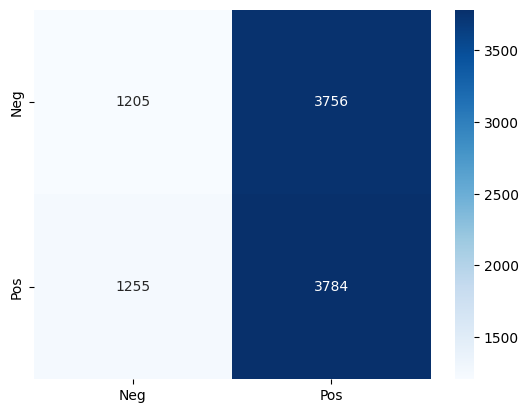

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print("Test Accuracy:", acc)

y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.show()


Dataset shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 413s 725ms/step - accuracy: 0.7249 - loss: 0.5240 - val_accuracy: 0.8482 - val_loss: 0.3517
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 414s 735ms/step - accuracy: 0.8979 - loss: 0.2603 - val_accuracy: 0.8842 - val_loss: 0.3317
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 418s 743ms/step - accuracy: 0.9228 - loss: 0.2016 - val_accuracy: 0.8878 - val_loss: 0.2846
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 412s 733ms/step - accuracy: 0.9457 - loss: 0.1535 - val_accuracy: 0.8855 - val_loss: 0.3642
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 414s 735ms/step - accuracy: 0.9563 - loss: 0.1205 - val_accuracy: 0.8842 - val_loss: 0.3615


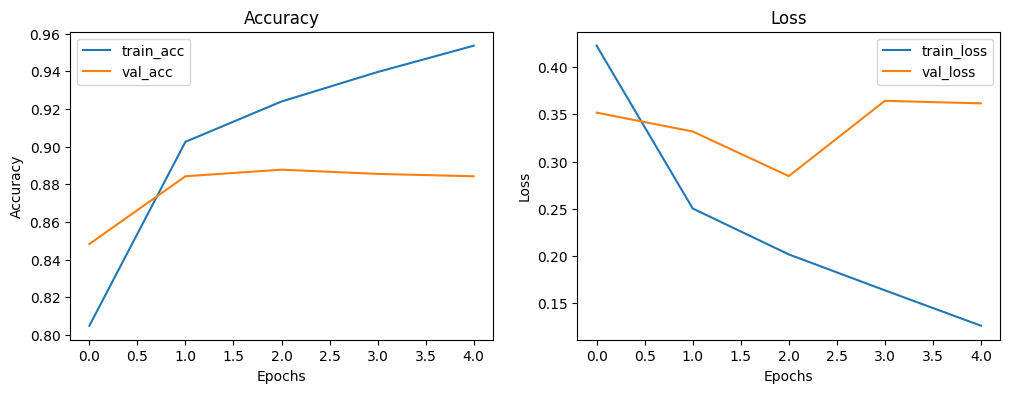

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.8849 - loss: 0.3425
Test Accuracy: 0.8847000002861023
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4961
           1       0.91      0.86      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



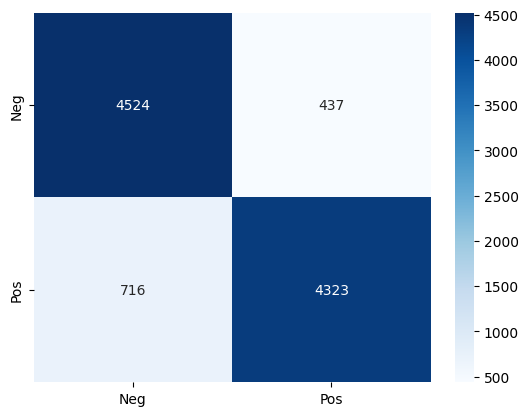

In [ ]:
# ===============================
# Step 1: Load Dataset
# ===============================
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv", escapechar='\\', engine="python")
print("Dataset shape:", df.shape)
print(df.head())

# Encode labels: positive=1, negative=0
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# ===============================
# Step 2: Text Cleaning
# ===============================
import re

def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)   # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove non-letters
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

# ===============================
# Step 3: Train-Test Split
# ===============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# ===============================
# Step 4: Tokenization + Padding
# ===============================
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_WORDS = 10000
MAXLEN = 300

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAXLEN)
X_test_pad  = pad_sequences(X_test_seq, maxlen=MAXLEN)

# ===============================
# Step 5: Build Bidirectional LSTM Model
# ===============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=128, input_length=MAXLEN),
    Bidirectional(LSTM(64)),
    Dropout(0.3),        # slightly lower dropout for first run
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ===============================
# Step 6: Train the Model
# ===============================
history = model.fit(
    X_train_pad,
    y_train,
    epochs=5,            # start with 5, can increase
    batch_size=64,
    validation_split=0.1
)

# ===============================
# Step 7: Plot Training History
# ===============================
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# ===============================
# Step 8: Evaluate Model
# ===============================
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print("Test Accuracy:", acc)

# Predict class labels
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.show()


In [ ]:
def predict_review(review_text):
    # 1. Clean the text
    text = re.sub(r"<.*?>", " ", review_text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()

    # 2. Tokenize and pad
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=MAXLEN)

    # 3. Predict probability
    pred_prob = model.predict(pad)[0][0]

    # 4. Convert to binary label
    label = "Positive" if pred_prob > 0.5 else "Negative"

    # 5. Optionally return probability as well
    return label, pred_prob


In [ ]:
review = "The movie was amazing! I loved the acting and the storyline."
label, prob = predict_review(review)
print(f"Predicted Sentiment: {label} (Probability: {prob:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Predicted Sentiment: Positive (Probability: 0.92)


In [ ]:
review = "I did not enjoy this movie at all. It was boring and too long."
label, prob = predict_review(review)
print(f"Predicted Sentiment: {label} (Probability: {prob:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Sentiment: Negative (Probability: 0.03)
